In [ ]:
import re

text = 'A07CS0030 -- 89 - 2020-12-20 – Pass -- SCSP3223'

pattern = re.compile(r'(?P<matric_number>\w+) -- (?P<scores>\d+) - (?P<date>\d{4}-\d{2}-\d{2}) - (?P<result>\w+) -- (P?<subject_code>\w+)')

match = pattern.match(text)

if match:
    print("Matric number: ", match.group('matric_number'))
    print("Scores for Test:", match.group('scores'))
    print("Date:", match.group('date'))
    print("Result:", match.group('result'))
    print("Subject Code:", match.group('subject_code'))

In [7]:
import pandas as pd
import numpy as np

df1 = pd.read_csv (r'data-q1-2.csv')
df1.head()

,TIME,tmps001,tmps002,tmps003,tmps004
0,0:00,999.90,24.99,24.33,NaN
1,0:20,26.71,25.99,25.33,26.25
2,0:40,26.21,26.83,26.60,26.99
3,1:00,27.72,27.30,26.25,26.53
4,1:20,26.27,25.58,25.55,25.76


In [8]:
df1.isnull().sum()

TIME       0
tmps001    2
tmps002    1
tmps003    1
tmps004    3
dtype: int64

In [26]:
df1.replace(999.90 , np.nan,inplace=True)
df1.fillna(df1.mean(numeric_only=True))

,TIME,Room1,Room2,Room3,Room4
0,0:00,26.53625,24.990000,24.330000,26.691935
1,0:20,26.71000,25.990000,25.330000,26.250000
2,0:40,26.21000,26.830000,26.600000,26.990000
3,1:00,27.72000,27.300000,26.250000,26.530000
4,1:20,26.27000,25.580000,25.550000,25.760000
5,1:40,25.65000,25.390000,25.660000,25.830000
6,2:00,26.32000,26.080000,26.110000,26.310000
7,2:20,25.89000,26.285882,25.440000,26.200000
8,2:40,26.16000,25.340000,26.300000,25.510000
9,3:00,25.67000,25.270000,25.780000,26.310000


In [18]:
df1.rename(columns={'tmps001' : 'Room1' , 'tmps002' : 'Room2','tmps003' : 'Room3','tmps004' : 'Room4'} , inplace =True)
df1.head()

,TIME,Room1,Room2,Room3,Room4
0,0:00,NaN,24.99,24.33,NaN
1,0:20,26.71,25.99,25.33,26.25
2,0:40,26.21,26.83,26.60,26.99
3,1:00,27.72,27.30,26.25,26.53
4,1:20,26.27,25.58,25.55,25.76


In [20]:
scores = [40, 60, 55, 87, 97, 78, 30, 59, 98, 96, 76, 83, 80, 88, 75, 73, 72, 59, 50, 20]

In [27]:
bins = [0,29,34,39,44,49,54,59,64,69,74,79,89,100]
labels=['E','D-','D','D+','C-','C','C+','B-','B','B+','A-','A','A+']
cats = pd.cut(scores,bins ,labels = labels)
cats

['D+', 'B-', 'C+', 'A', 'A+', ..., 'B+', 'B+', 'C+', 'C', 'E']
Length: 20
Categories (13, object): ['E' < 'D-' < 'D' < 'D+' ... 'B+' < 'A-' < 'A' < 'A+']

In [28]:
pd.value_counts(cats)

A     4
C+    3
A-    3
A+    3
B+    2
E     1
D-    1
D+    1
C     1
B-    1
D     0
C-    0
B     0
dtype: int64

In [33]:
df2 = pd.read_excel(r'data-q2-1.xlsx')
df2

,Year,State,Administrative district,Sex,Number of Live births
0,2018,Johor,Batu Pahat,Male,3651
1,2018,Johor,Batu Pahat,Female,3366
2,2018,Johor,Johor Bahru,Male,13707
3,2018,Johor,Johor Bahru,Female,12722
4,2018,Johor,Kluang,Male,2439
...,...,...,...,...,...
1163,2015,W.P. Kuala Lumpur,W.P. Kuala Lumpur,Female,12378
1164,2015,W.P. Labuan,W.P. Labuan,Male,1023
1165,2015,W.P. Labuan,W.P. Labuan,Female,930
1166,2015,W.P. Putrajaya,W.P. Putrajaya,Male,1515


In [47]:
df3 = pd.read_excel(r'data-q2-2.xlsx')
df3

,Year,State,Administrative district,Sex,Number of Deaths
0,2018,Johor,Batu Pahat,Male,1674
1,2018,Johor,Batu Pahat,Female,1304
2,2018,Johor,Johor Bahru,Male,4217
3,2018,Johor,Johor Bahru,Female,2850
4,2018,Johor,Kluang,Male,1177
...,...,...,...,...,...
1163,2015,W.P. Kuala Lumpur,W.P. Kuala Lumpur,Male,4395
1164,2015,W.P. Labuan,W.P. Labuan,Female,103
1165,2015,W.P. Labuan,W.P. Labuan,Male,143
1166,2015,W.P. Putrajaya,W.P. Putrajaya,Female,98


In [48]:
merged = pd.merge(df2,df3, on=['Year','State','Administrative district'])
merged

,Year,State,Administrative district,Sex_x,Number of Live births,Sex_y,Number of Deaths
0,2018,Johor,Batu Pahat,Male,3651,Male,1674
1,2018,Johor,Batu Pahat,Male,3651,Female,1304
2,2018,Johor,Batu Pahat,Female,3366,Male,1674
3,2018,Johor,Batu Pahat,Female,3366,Female,1304
4,2018,Johor,Johor Bahru,Male,13707,Male,4217
...,...,...,...,...,...,...,...
2331,2015,W.P. Labuan,W.P. Labuan,Female,930,Male,143
2332,2015,W.P. Putrajaya,W.P. Putrajaya,Male,1515,Female,98
2333,2015,W.P. Putrajaya,W.P. Putrajaya,Male,1515,Male,95
2334,2015,W.P. Putrajaya,W.P. Putrajaya,Female,1354,Female,98


In [49]:
merged.set_index(['Year','State','Administrative district'])

Sex_x  Number of Live births  \
Year State          Administrative district                                  
2018 Johor          Batu Pahat                 Male                   3651   
                    Batu Pahat                 Male                   3651   
                    Batu Pahat               Female                   3366   
                    Batu Pahat               Female                   3366   
                    Johor Bahru                Male                  13707   
...                                             ...                    ...   
2015 W.P. Labuan    W.P. Labuan              Female                    930   
     W.P. Putrajaya W.P. Putrajaya             Male                   1515   
                    W.P. Putrajaya             Male                   1515   
                    W.P. Putrajaya           Female                   1354   
                    W.P. Putrajaya           Female                   1354   

                                              Sex_y  Number of Deaths  
Year State          Administrative district                            
2018 Johor          Batu Pahat                 Male              1674  
                    Batu Pahat               Female              1304  
                    Batu Pahat                 Male              1674  
                    Batu Pahat               Female              1304  
                    Johor Bahru                Male              4217  
...                                             ...               ...  
2015 W.P. Labuan    W.P. Labuan                Male               143  
     W.P. Putrajaya W.P. Putrajaya           Female                98  
                    W.P. Putrajaya             Male                95  
                    W.P. Putrajaya           Female                98  
                    W.P. Putrajaya             Male                95  

[2336 rows x 4 columns]

In [59]:
sample = merged.groupby('Year')['Number of Live births'].sum()
sample

Year
2015    1042272
2016    1016406
2017    1017370
2018    1003890
Name: Number of Live births, dtype: int64

In [64]:
sample_2 = merged.groupby(['State' , 'Administrative district'])[['Number of Live births' , 'Number of Deaths']].sum()
sample_2

Number of Live births  \
State              Administrative district                          
Johor              Batu pahat                               27968   
                   Johor Bahru                             100484   
                   Kluang                                   19426   
                   Kota tinggi                              17832   
                   Kulai                                    16634   
...                                                           ...   
W.P. Kuala Lumpur  W.P. Kuala Lumpur                       103056   
W.P. Kuala Lumpur  W.P. Kuala Lumpur                        97934   
W.P. Labuan        W.P. Labuan                               7410   
W.P. Labuan        W.P. Labuan                               6752   
W.P. Putrajaya     W.P. Putrajaya                           20710   

                                            Number of Deaths  
State              Administrative district                    
Johor              Batu pahat                          11406  
                   Johor Bahru                         24928  
                   Kluang                               6956  
                   Kota tinggi                          5808  
                   Kulai                                4674  
...                                                      ...  
W.P. Kuala Lumpur  W.P. Kuala Lumpur                   31370  
W.P. Kuala Lumpur  W.P. Kuala Lumpur                   33380  
W.P. Labuan        W.P. Labuan                          1046  
W.P. Labuan        W.P. Labuan                          1068  
W.P. Putrajaya     W.P. Putrajaya                       1606  

[231 rows x 2 columns]

In [140]:
data1 = pd.read_excel (r'data-q2-3.xlsx')
data2 = pd.read_excel (r'data-q2-4.xlsx')
data3 = pd.read_excel (r'data-q2-5.xlsx')

data1

,STATE,PRISON
0,JOHOR,PENJARA KLUANG
1,JOHOR,PENJARA KLUANG
2,JOHOR,PENJARA SIMPANG RENGGAM
3,JOHOR,PENJARA SIMPANG RENGGAM
4,JOHOR,PUSAT KOREKSIONAL JOHOR BAHRU
5,JOHOR,PUSAT KOREKSIONAL JOHOR BAHRU
6,JOHOR,PUSAT KOREKSIONAL MUAR
7,JOHOR,PUSAT KOREKSIONAL MUAR


In [141]:
data4 = pd.concat([data1,data2], ignore_index = True)
data4

,STATE,PRISON
0,JOHOR,PENJARA KLUANG
1,JOHOR,PENJARA KLUANG
2,JOHOR,PENJARA SIMPANG RENGGAM
3,JOHOR,PENJARA SIMPANG RENGGAM
4,JOHOR,PUSAT KOREKSIONAL JOHOR BAHRU
5,JOHOR,PUSAT KOREKSIONAL JOHOR BAHRU
6,JOHOR,PUSAT KOREKSIONAL MUAR
7,JOHOR,PUSAT KOREKSIONAL MUAR
8,KEDAH,PENJARA ALOR SETAR
9,KEDAH,PENJARA ALOR SETAR


In [146]:
data5 = pd.concat([data3,data4] , axis=1 )
data5

,GENDER,TOTAL,STATE,PRISON
0,MALE,3417,JOHOR,PENJARA KLUANG
1,FEMALE,1948,JOHOR,PENJARA KLUANG
2,MALE,8501,JOHOR,PENJARA SIMPANG RENGGAM
3,FEMALE,1,JOHOR,PENJARA SIMPANG RENGGAM
4,MALE,394,JOHOR,PUSAT KOREKSIONAL JOHOR BAHRU
5,FEMALE,0,JOHOR,PUSAT KOREKSIONAL JOHOR BAHRU
6,MALE,36,JOHOR,PUSAT KOREKSIONAL MUAR
7,FEMALE,0,JOHOR,PUSAT KOREKSIONAL MUAR
8,MALE,1341,KEDAH,PENJARA ALOR SETAR
9,FEMALE,631,KEDAH,PENJARA ALOR SETAR


In [147]:
data5 = data5.set_index(['STATE','PRISON'])

In [148]:
data5 = data5.swaplevel(0,1)

In [149]:
sample = data5.groupby('PRISON')['TOTAL'].sum()
sample

PRISON
PENJARA ALOR SETAR               1972
PENJARA KLUANG                   5365
PENJARA POKOK SENA               4465
PENJARA SIMPANG RENGGAM          8502
PENJARA SUNGAI PETANI            1068
PUSAT KOREKSIONAL JOHOR BAHRU     394
PUSAT KOREKSIONAL MUAR             36
Name: TOTAL, dtype: int64

In [96]:
question3 = pd.read_csv(r'data-q3-1.csv')
question3.head(15)

,Year,Crude Rate of Natural Increase,Crude Birth Rate,Crude Death Rate,Total Fertility Rate,Neonatal Mortality Rate,Infant Mortality Rate,Toddler Mortality Rate,Maternal Mortality Rate
0,1970,25.7,32.4,6.7,4.9,21.4,39.4,4.2,140.8
1,1971,26.3,32.8,6.6,4.9,20.8,37.2,4.0,112.2
2,1972,25.9,32.2,6.3,4.7,21.0,36.1,3.4,99.0
3,1973,24.8,31.1,6.3,4.5,21.4,36.8,3.7,97.4
4,1974,25.3,31.3,6.0,4.4,20.5,33.8,3.1,90.1
5,1975,24.8,30.7,6.0,4.3,19.3,32.2,3.1,77.3
6,1976,25.3,30.9,5.7,4.2,16.9,28.8,2.6,72.7
7,1977,24.5,30.3,5.8,4.1,16.7,29.3,2.9,70.7
8,1978,24.3,29.7,5.4,4.0,15.5,26.1,2.3,75.5
9,1979,25.0,30.4,5.4,4.0,14.9,25.1,2.4,59.6


In [171]:
big_chart = question3[['Year','Neonatal Mortality Rate','Infant Mortality Rate','Toddler Mortality Rate']]
big_chart.head(5)



,Year,Neonatal Mortality Rate,Infant Mortality Rate,Toddler Mortality Rate
0,1970,21.4,39.4,4.2
1,1971,20.8,37.2,4.0
2,1972,21.0,36.1,3.4
3,1973,21.4,36.8,3.7
4,1974,20.5,33.8,3.1


In [170]:
small_chart = question3[['Maternal Mortality Rate']]
small_chart.head(5)

,Maternal Mortality Rate
0,140.8
1,112.2
2,99.0
3,97.4
4,90.1


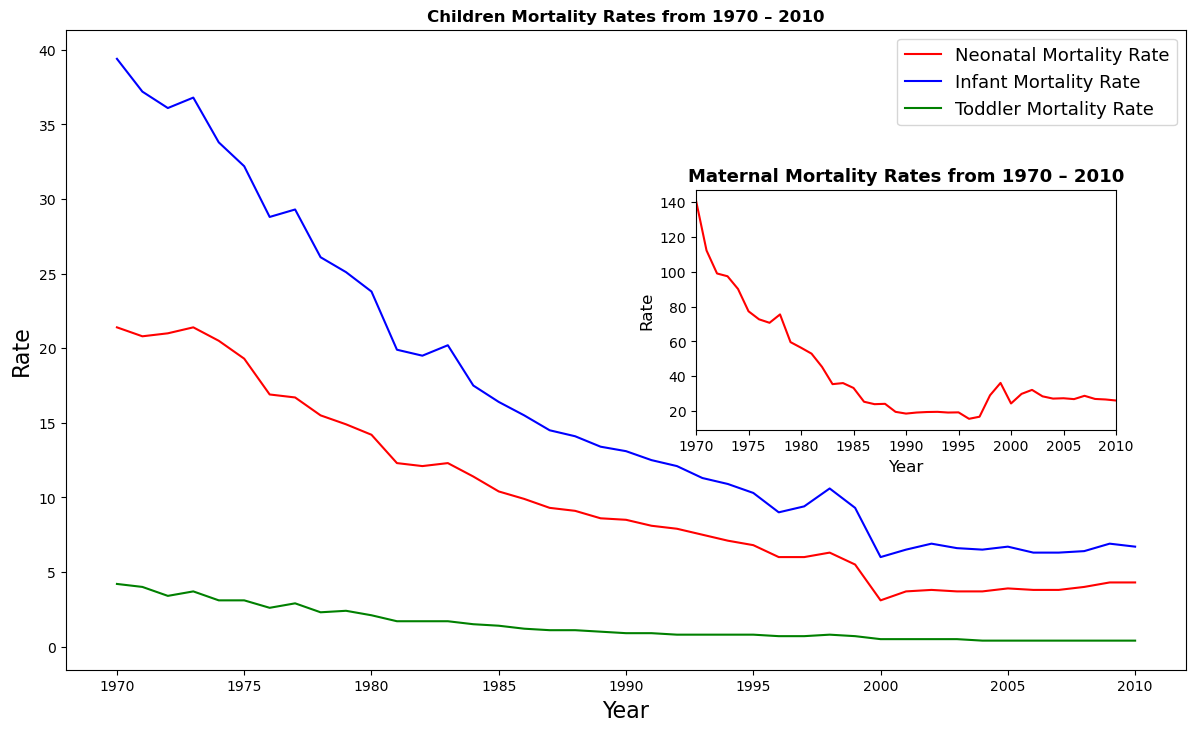

In [172]:
fig = plt.figure(figsize=(14,8))

ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax1.plot(question3['Year'], question3['Neonatal Mortality Rate'], color='red', label='Neonatal Mortality Rate')
ax1.plot(question3['Year'], question3['Infant Mortality Rate'], color='blue', label='Infant Mortality Rate')
ax1.plot(question3['Year'], question3['Toddler Mortality Rate'], color='green', label='Toddler Mortality Rate')
ax1.set_title('Children Mortality Rates from 1970 – 2010', fontweight='bold')
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Rate', fontsize=16)
ax1.legend(loc='upper right', fontsize=13)

ax2 = fig.add_axes([0.55, 0.4, 0.3, 0.3])
ax2.plot(question3['Year'], question3['Maternal Mortality Rate'], color='red')
ax2.set_title('Maternal Mortality Rates from 1970 – 2010', fontweight='bold', fontsize=13)
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Rate', fontsize=12)
ax2.set_xlim(1970,2010)


plt.show()

In [161]:
question4 = pd.read_csv(r'data-q4-1.csv')
question4

,staff_id,department,salary,increment
0,S0001,HR,3500,0.03
1,S0002,Sales,5000,0.06
2,S0003,IT,3000,0.02
3,S0004,Sales,4300,0.05
4,S0005,Sales,3200,0.09
5,S0006,HR,3200,0.06
6,S0007,HR,3100,0.03
7,S0008,IT,3500,0.02
8,S0009,IT,4000,0.06
9,S0010,HR,4100,0.01


In [162]:
question4['increment_amount'] = question4['salary'] *question4['increment']
question4

,staff_id,department,salary,increment,increment_amount
0,S0001,HR,3500,0.03,105.0
1,S0002,Sales,5000,0.06,300.0
2,S0003,IT,3000,0.02,60.0
3,S0004,Sales,4300,0.05,215.0
4,S0005,Sales,3200,0.09,288.0
5,S0006,HR,3200,0.06,192.0
6,S0007,HR,3100,0.03,93.0
7,S0008,IT,3500,0.02,70.0
8,S0009,IT,4000,0.06,240.0
9,S0010,HR,4100,0.01,41.0


In [163]:
question4['new_salary'] = question4['salary'] + question4['increment_amount']
question4

,staff_id,department,salary,increment,increment_amount,new_salary
0,S0001,HR,3500,0.03,105.0,3605.0
1,S0002,Sales,5000,0.06,300.0,5300.0
2,S0003,IT,3000,0.02,60.0,3060.0
3,S0004,Sales,4300,0.05,215.0,4515.0
4,S0005,Sales,3200,0.09,288.0,3488.0
5,S0006,HR,3200,0.06,192.0,3392.0
6,S0007,HR,3100,0.03,93.0,3193.0
7,S0008,IT,3500,0.02,70.0,3570.0
8,S0009,IT,4000,0.06,240.0,4240.0
9,S0010,HR,4100,0.01,41.0,4141.0


In [207]:
samples = question4.groupby('department')['salary'].sum()
samples

department
HR       17500
IT       15300
Sales    20700
Name: salary, dtype: int64

In [205]:
samples.describe()

count        3.000000
mean     18760.666667
std       3204.025957
min      15862.000000
25%      17040.500000
50%      18219.000000
75%      20210.000000
max      22201.000000
Name: new_salary, dtype: float64

In [178]:
supermarket = pd.read_csv(r'data-q4-2.csv')
supermarket.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [184]:
supermarket.groupby(['City','Customer type'])['Invoice ID'].count()

City       Customer type
Mandalay   Member           18
           Normal           12
Naypyitaw  Member           15
           Normal           20
Yangon     Member           17
           Normal           18
Name: Invoice ID, dtype: int64

In [185]:
supermarket.groupby(['Product line','Customer type','Gender'])['Rating'].max()

Product line            Customer type  Gender
Electronic accessories  Member         Female     9.5
                                       Male       8.1
                        Normal         Female     9.6
                                       Male       9.9
Fashion accessories     Member         Female     9.9
                                       Male       8.6
                        Normal         Female     7.7
                                       Male       9.9
Food and beverages      Member         Female     8.5
                                       Male       9.5
                        Normal         Female     9.6
                                       Male       9.6
Health and beauty       Member         Female     9.1
                                       Male       8.6
                        Normal         Female     7.6
                                       Male       7.4
Home and lifestyle      Member         Female     8.5
                                    

In [186]:
supermarket.groupby(['City','Product line'])['gross income'].sum()

City       Product line          
Mandalay   Electronic accessories     29.5730
           Fashion accessories        60.9615
           Food and beverages         61.1005
           Health and beauty         149.8495
           Home and lifestyle         50.1600
           Sports and travel         142.2770
Naypyitaw  Electronic accessories    146.1245
           Fashion accessories       114.3445
           Food and beverages        199.0210
           Health and beauty          66.1915
           Home and lifestyle         68.5860
           Sports and travel          70.8455
Yangon     Electronic accessories     73.2835
           Fashion accessories        17.7715
           Food and beverages         66.1385
           Health and beauty         178.4210
           Home and lifestyle        111.4620
           Sports and travel         138.0475
Name: gross income, dtype: float64

In [187]:
supermarket.groupby(['Payment','Gender','Customer type'])['Invoice ID'].count()

Payment      Gender  Customer type
Cash         Female  Member            8
                     Normal            8
             Male    Member           10
                     Normal            9
Credit card  Female  Member            7
                     Normal            3
             Male    Member            7
                     Normal            8
Ewallet      Female  Member           14
                     Normal            9
             Male    Member            4
                     Normal           13
Name: Invoice ID, dtype: int64